# Chapter 5, Example 4a
## Implementing L2 regularizers for training

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
num_classes = 10
no_epochs = 20

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=20),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = batch_size,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x,test_y))
    
    return history

histories={}

In [6]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu'),
  Dense(500, activation='relu'),
  Dense(10, activation='softmax')
])

histories['model'] = compile_and_fit(model, 'model')

Epoch 1/1000
469/469 [==============================] - 5s 9ms/step - loss: 0.2104 - ce: 0.2103 - accuracy: 0.9379 - val_loss: 0.0980 - val_ce: 0.0972 - val_accuracy: 0.9679

Epoch: 0, accuracy:0.9379,  ce:0.2103,  loss:0.2104,  val_accuracy:0.9679,  val_ce:0.0972,  val_loss:0.0980,  
.Epoch 2/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.0773 - ce: 0.0773 - accuracy: 0.9760 - val_loss: 0.0831 - val_ce: 0.0822 - val_accuracy: 0.9734
.Epoch 3/1000
469/469 [==============================] - 6s 12ms/step - loss: 0.0481 - ce: 0.0481 - accuracy: 0.9847 - val_loss: 0.0706 - val_ce: 0.0698 - val_accuracy: 0.9795
.Epoch 4/1000
469/469 [==============================] - 6s 13ms/step - loss: 0.0363 - ce: 0.0363 - accuracy: 0.9883 - val_loss: 0.1006 - val_ce: 0.0995 - val_accuracy: 0.9718
.Epoch 5/1000
469/469 [==============================] - 6s 12ms/step - loss: 0.0288 - ce: 0.0288 - accuracy: 0.9904 - val_loss: 0.0785 - val_ce: 0.0776 - val_accuracy: 0.9782
.Epoch 6/1

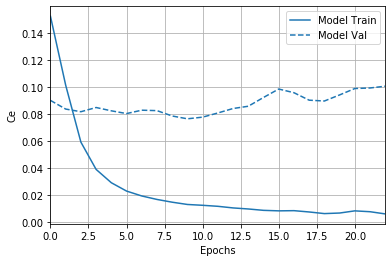

In [7]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

In [19]:
regularized_model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu', kernel_regularizer=l2(0.0001)),
  Dense(500, activation='relu', kernel_regularizer=l2(0.0001)),
  Dense(10, activation='softmax')
])

histories['l2-model'] = compile_and_fit(regularized_model, 'l2-model')

Epoch 1/1000
469/469 [==============================] - 7s 13ms/step - loss: 0.3084 - ce: 0.2121 - accuracy: 0.9368 - val_loss: 0.1882 - val_ce: 0.0988 - val_accuracy: 0.9671

Epoch: 0, accuracy:0.9368,  ce:0.2121,  loss:0.3084,  val_accuracy:0.9671,  val_ce:0.0988,  val_loss:0.1882,  
.Epoch 2/1000
469/469 [==============================] - 6s 12ms/step - loss: 0.1677 - ce: 0.0845 - accuracy: 0.9739 - val_loss: 0.1691 - val_ce: 0.0898 - val_accuracy: 0.9712
.Epoch 3/1000
469/469 [==============================] - 6s 14ms/step - loss: 0.1323 - ce: 0.0584 - accuracy: 0.9813 - val_loss: 0.1409 - val_ce: 0.0697 - val_accuracy: 0.9780
.Epoch 4/1000
469/469 [==============================] - 6s 14ms/step - loss: 0.1145 - ce: 0.0471 - accuracy: 0.9845 - val_loss: 0.1443 - val_ce: 0.0783 - val_accuracy: 0.9754
.Epoch 5/1000
469/469 [==============================] - 6s 14ms/step - loss: 0.1033 - ce: 0.0407 - accuracy: 0.9868 - val_loss: 0.1330 - val_ce: 0.0712 - val_accuracy: 0.9794
.Epoch 6/

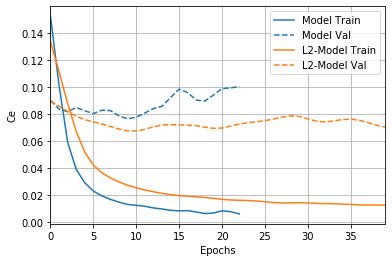

In [20]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

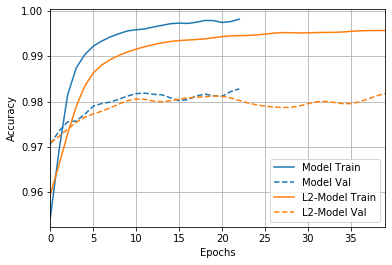

In [21]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)